In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load the dataset
df = pd.read_csv('./Walmart.csv', encoding_errors='ignore')

print("🔍 INITIAL DATA INSPECTION")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

In [9]:
#all duplicates
df.duplicated().sum()

np.int64(51)

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [12]:
#droppping all rows with missing records
df.dropna(inplace=True)

# verify
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [13]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

In [14]:
df['unit_price'] = df['unit_price'].str.replace('$', '').astype(float)

df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 934.6+ KB


In [16]:
df['total'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [25]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

In [18]:
print("\n=== SALES SUMMARY ===")
total_sales = df['total'].sum()
avg_sales = df['total'].mean()
max_sales = df['total'].max()
min_sales = df['total'].min()

print(f"Total Revenue: ${total_sales:,.2f}")
print(f"Average Sale: ${avg_sales:.2f}")
print(f"Highest Sale: ${max_sales:.2f}")
print(f"Lowest Sale: ${min_sales:.2f}")

print(f"\nTotal Orders: {len(df)}")
print(f"Average Rating: {df['rating'].mean():.1f}")


=== SALES SUMMARY ===
Total Revenue: $1,209,726.38
Average Sale: $121.35
Highest Sale: $993.00
Lowest Sale: $10.17

Total Orders: 9969
Average Rating: 5.8


In [19]:
print("\n=== CATEGORY ANALYSIS ===")

# Count by category
category_counts = df['category'].value_counts()
print("Orders by Category:")
print(category_counts)

# Revenue by category
category_revenue = df.groupby('category')['total'].sum()
print("\nRevenue by Category:")
for cat, revenue in category_revenue.items():
    print(f"{cat}: ${revenue:.2f}")

# Average sale by category
category_avg = df.groupby('category')['total'].mean()
print("\nAverage Sale by Category:")
for cat, avg in category_avg.items():
    print(f"{cat}: ${avg:.2f}")


=== CATEGORY ANALYSIS ===
Orders by Category:
category
Fashion accessories       4538
Home and lifestyle        4520
Electronic accessories     419
Food and beverages         174
Sports and travel          166
Health and beauty          152
Name: count, dtype: int64

Revenue by Category:
Electronic accessories: $78175.03
Fashion accessories: $489480.90
Food and beverages: $53471.28
Health and beauty: $46851.18
Home and lifestyle: $489250.06
Sports and travel: $52497.93

Average Sale by Category:
Electronic accessories: $186.58
Fashion accessories: $107.86
Food and beverages: $307.31
Health and beauty: $308.23
Home and lifestyle: $108.24
Sports and travel: $316.25


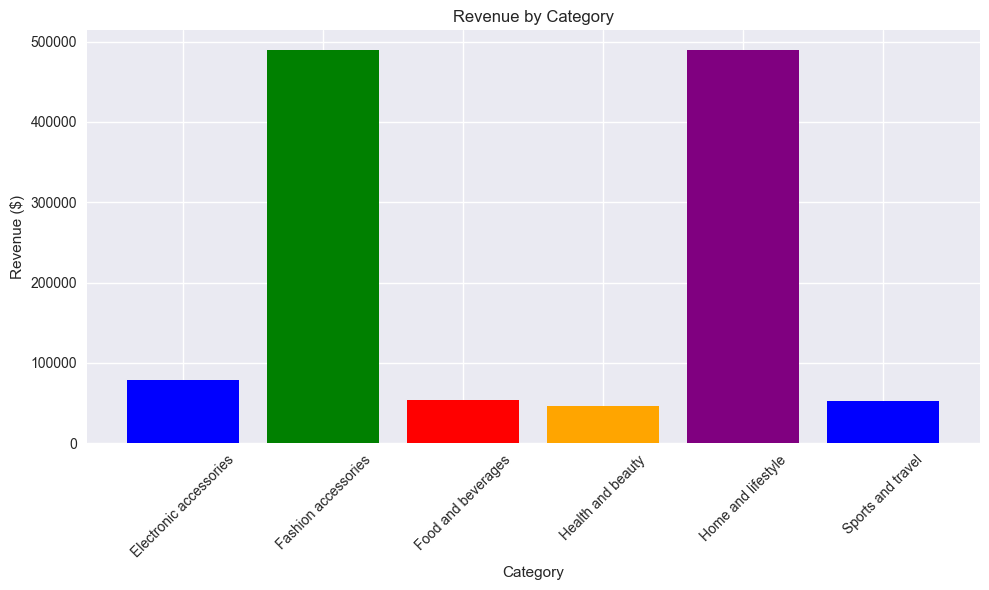

In [ ]:
# Category Revenue

plt.figure(figsize=(10, 6))
categories = list(category_revenue.index)
revenues = list(category_revenue.values)

plt.bar(categories, revenues, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

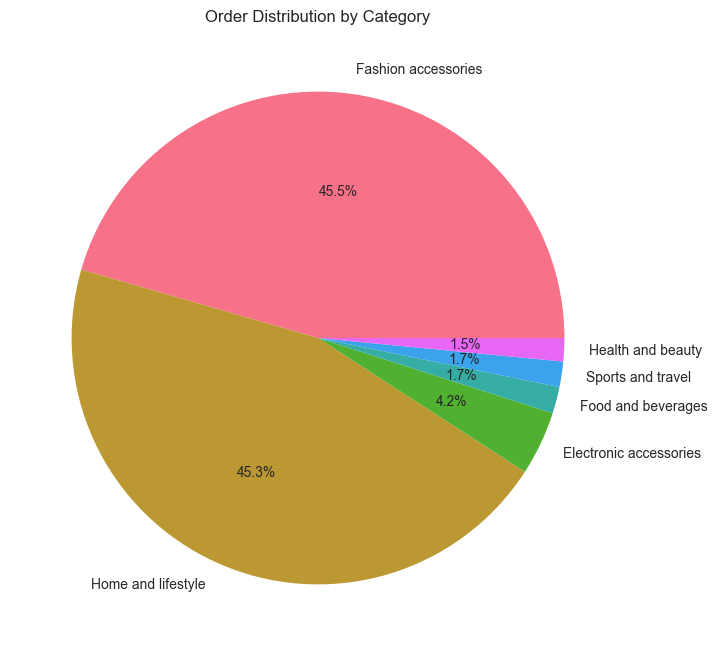

In [ ]:
# Category Count
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Order Distribution by Category')
plt.show()

In [26]:
print("\n=== CITY ANALYSIS ===")

# Revenue by city
city_revenue = df.groupby('city')['total'].sum().sort_values(ascending=False)
print("Revenue by City:")
for city, revenue in city_revenue.items():
    print(f"{city}: ${revenue:.2f}")

# Orders by city
city_counts = df['city'].value_counts()
print("\nOrders by City:")
print(city_counts)


=== CITY ANALYSIS ===
Revenue by City:
Weslaco: $46351.79
Waxahachie: $40703.33
Plano: $25688.34
San Antonio: $24950.56
Port Arthur: $24524.37
Richardson: $24460.60
Rockwall: $24077.70
Round Rock: $23327.34
Schertz: $23095.43
San Marcos: $22124.51
Southlake: $21267.06
Temple: $21003.99
Sugar Land: $20062.24
Texas City: $20024.81
Rosenberg: $19598.92
Sherman: $19385.22
San Angelo: $18743.58
Rowlett: $18604.37
Tyler: $18431.83
Seguin: $18170.63
Weatherford: $18074.60
Waco: $17640.17
Victoria: $16009.03
McKinney: $13887.71
Big Spring: $13497.65
Galveston: $12242.22
Grapevine: $12200.46
Cleburne: $11780.27
Fort Worth: $11654.64
Pflugerville: $11635.25
Garland: $11359.39
Eagle Pass: $11256.17
Euless: $11248.74
Bryan: $11139.71
North Richland Hills: $10960.81
Mansfield: $10936.64
Killeen: $10832.76
Baytown: $10777.39
Del Rio: $10504.71
Georgetown: $10476.08
Mesquite: $10400.92
Cedar Park: $10346.11
Haltom City: $10232.41
Houston: $10225.68
Nacogdoches: $10174.64
Grand Prairie: $10122.92
Far

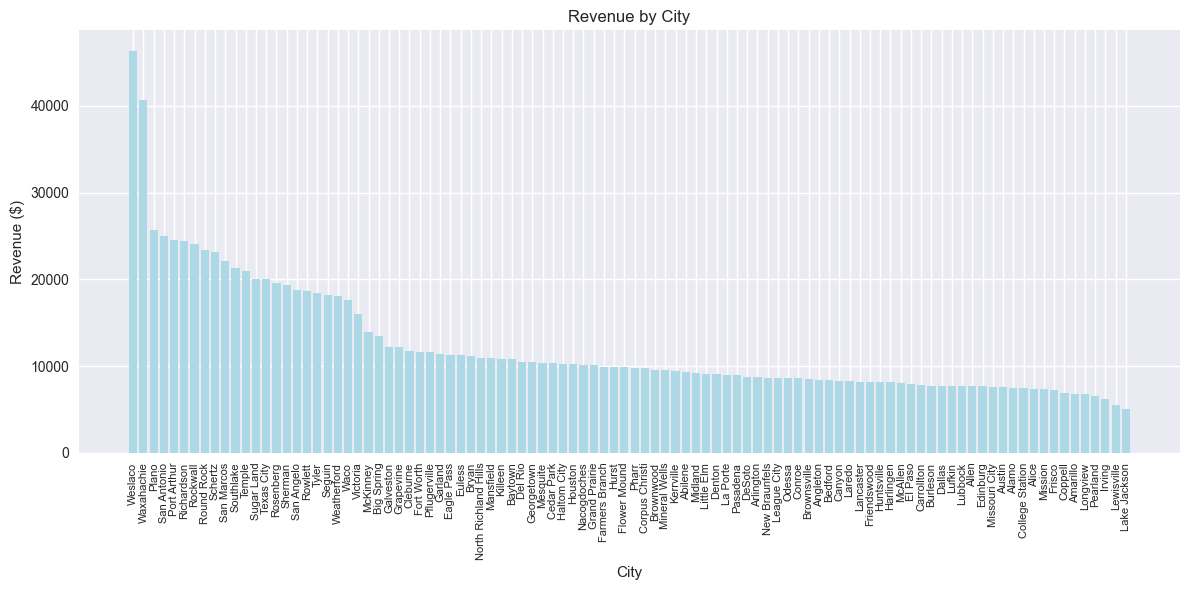

In [ ]:
# City Revenue
plt.figure(figsize=(12, 6))
cities = list(city_revenue.index)
revenues = list(city_revenue.values)

plt.bar(cities, revenues, color='lightblue')
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

In [33]:
print("\n=== PAYMENT METHOD ANALYSIS ===")

# Payment method counts
payment_counts = df['payment_method'].value_counts()
print("Payment Method Usage:")
print(payment_counts)

# Revenue by payment method
payment_revenue = df.groupby('payment_method')['total'].sum()
print("\nRevenue by Payment Method:")
for method, revenue in payment_revenue.items():
    print(f"{method}: ${revenue:.2f}")



=== PAYMENT METHOD ANALYSIS ===
Payment Method Usage:
payment_method
Credit card    4256
Ewallet        3881
Cash           1832
Name: count, dtype: int64

Revenue by Payment Method:
Cash: $263589.29
Credit card: $488821.02
Ewallet: $457316.07


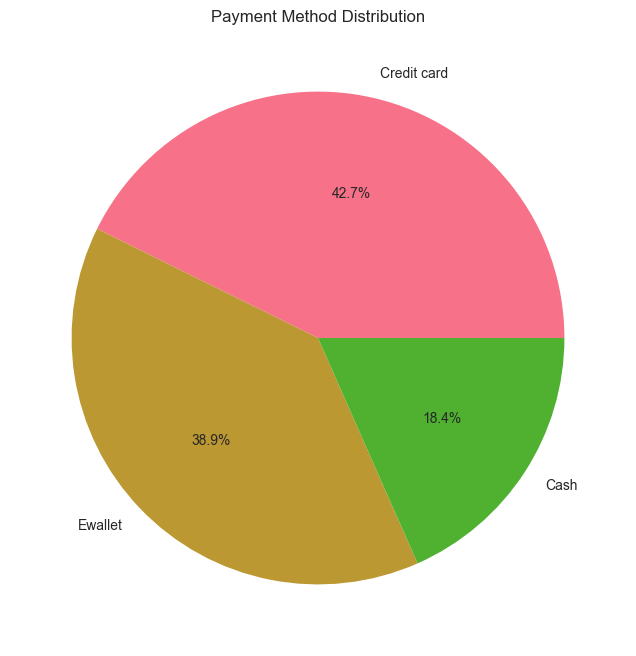

In [ ]:
# Payment method pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()


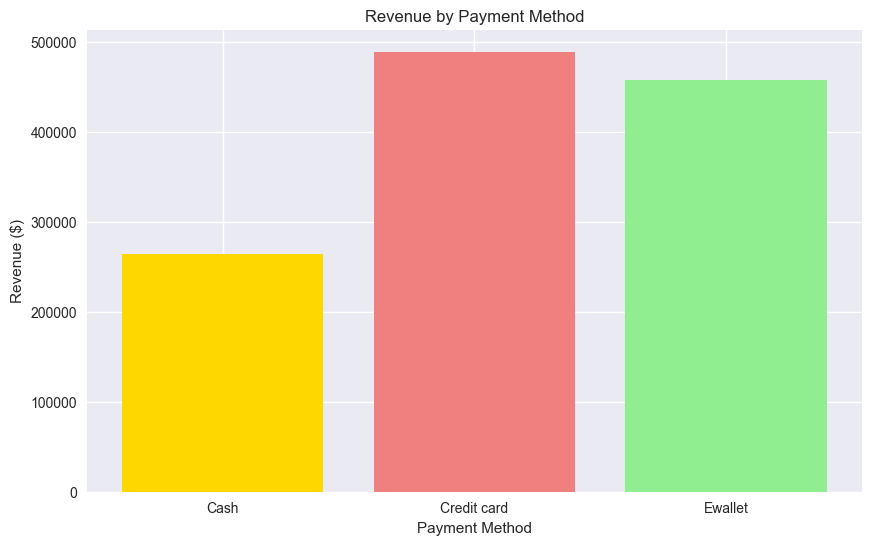

In [ ]:
# Payment revenue bar chart
plt.figure(figsize=(10, 6))
methods = list(payment_revenue.index)
revenues = list(payment_revenue.values)

plt.bar(methods, revenues, color=['gold', 'lightcoral', 'lightgreen'])
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Revenue ($)')
plt.show()


In [36]:
print("\n=== RATING ANALYSIS ===")

avg_rating = df['rating'].mean()
max_rating = df['rating'].max()
min_rating = df['rating'].min()

print(f"Average Rating: {avg_rating:.2f}")
print(f"Highest Rating: {max_rating}")
print(f"Lowest Rating: {min_rating}")

# Rating by category
rating_by_category = df.groupby('category')['rating'].mean()
print("\nAverage Rating by Category:")
for cat, rating in rating_by_category.items():
    print(f"{cat}: {rating:.1f}")


=== RATING ANALYSIS ===
Average Rating: 5.83
Highest Rating: 10.0
Lowest Rating: 3.0

Average Rating by Category:
Electronic accessories: 5.9
Fashion accessories: 5.8
Food and beverages: 7.1
Health and beauty: 7.0
Home and lifestyle: 5.7
Sports and travel: 6.9


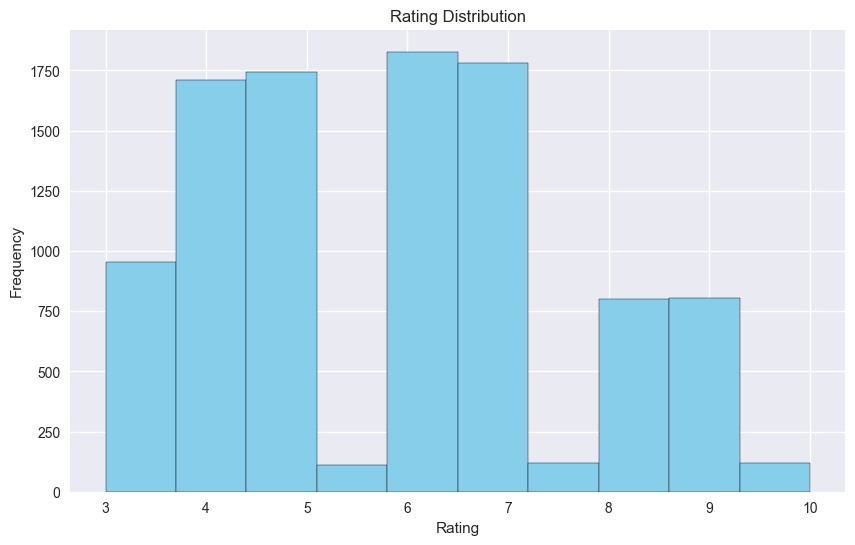

In [ ]:
# Rating distribution
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

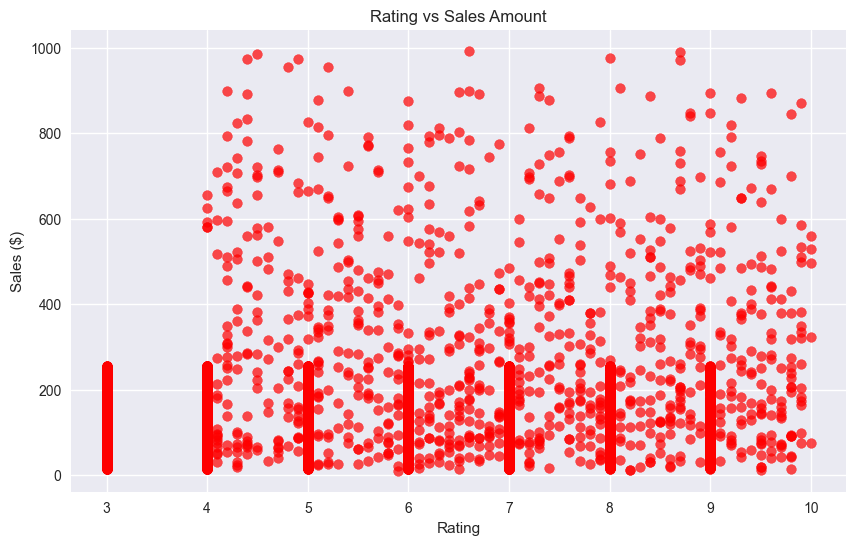

In [ ]:
# Rating vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['total'], color='red', alpha=0.7)
plt.title('Rating vs Sales Amount')
plt.xlabel('Rating')
plt.ylabel('Sales ($)')
plt.show()

In [40]:
print("\n=== PRICE & QUANTITY ANALYSIS ===")

avg_price = df['unit_price'].mean()
avg_quantity = df['quantity'].mean()

print(f"Average Unit Price: ${avg_price:.2f}")
print(f"Average Quantity: {avg_quantity:.2f}")

# Price range
print(f"Price Range: ${df['unit_price'].min():.2f} - ${df['unit_price'].max():.2f}")
print(f"Quantity Range: {df['quantity'].min():.1f} - {df['quantity'].max():.1f}")


=== PRICE & QUANTITY ANALYSIS ===
Average Unit Price: $50.62
Average Quantity: 2.36
Price Range: $10.08 - $99.96
Quantity Range: 1.0 - 10.0


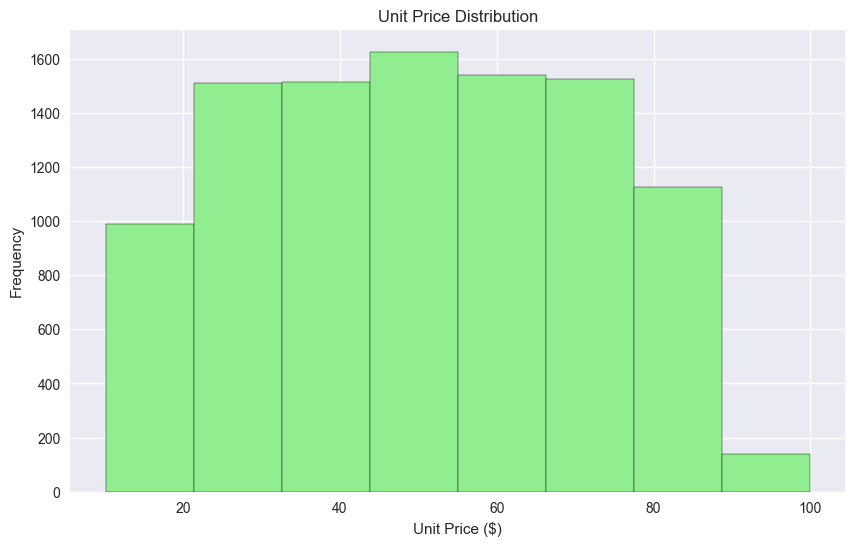

In [ ]:
# Unit price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['unit_price'], bins=8, color='lightgreen', edgecolor='black')
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.show()

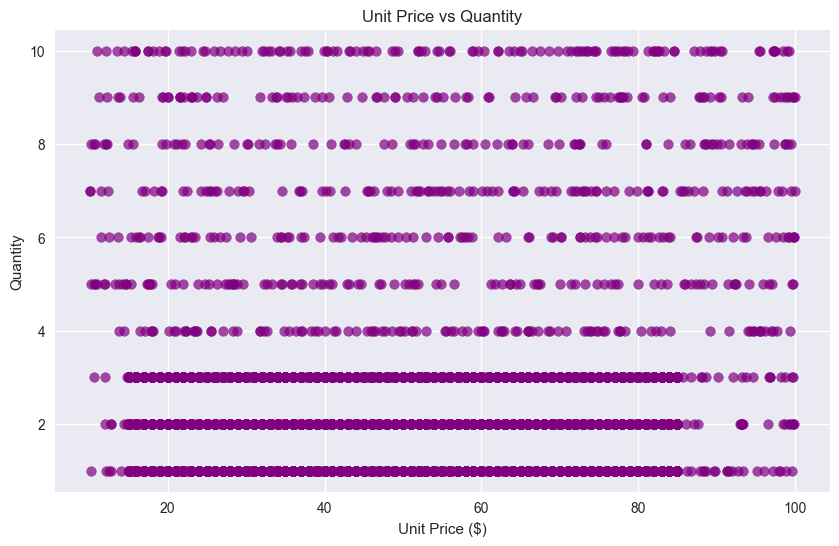

In [ ]:
# Price vs Quantity
plt.figure(figsize=(10, 6))
plt.scatter(df['unit_price'], df['quantity'], color='purple', alpha=0.7)
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity')
plt.show()

In [43]:
print("\n=== PROFIT ANALYSIS ===")

# Calculate total profit
df['total_profit'] = df['total'] * df['profit_margin']
total_profit = df['total_profit'].sum()

print(f"Total Profit: ${total_profit:.2f}")
print(f"Average Profit Margin: {df['profit_margin'].mean():.2f} ({df['profit_margin'].mean()*100:.0f}%)")

# Profit by category
profit_by_category = df.groupby('category')['total_profit'].sum()
print("\nProfit by Category:")
for cat, profit in profit_by_category.items():
    print(f"{cat}: ${profit:.2f}")


=== PROFIT ANALYSIS ===
Total Profit: $476139.43
Average Profit Margin: 0.39 (39%)

Profit by Category:
Electronic accessories: $30772.49
Fashion accessories: $192314.89
Food and beverages: $21552.86
Health and beauty: $18671.73
Home and lifestyle: $192213.64
Sports and travel: $20613.81


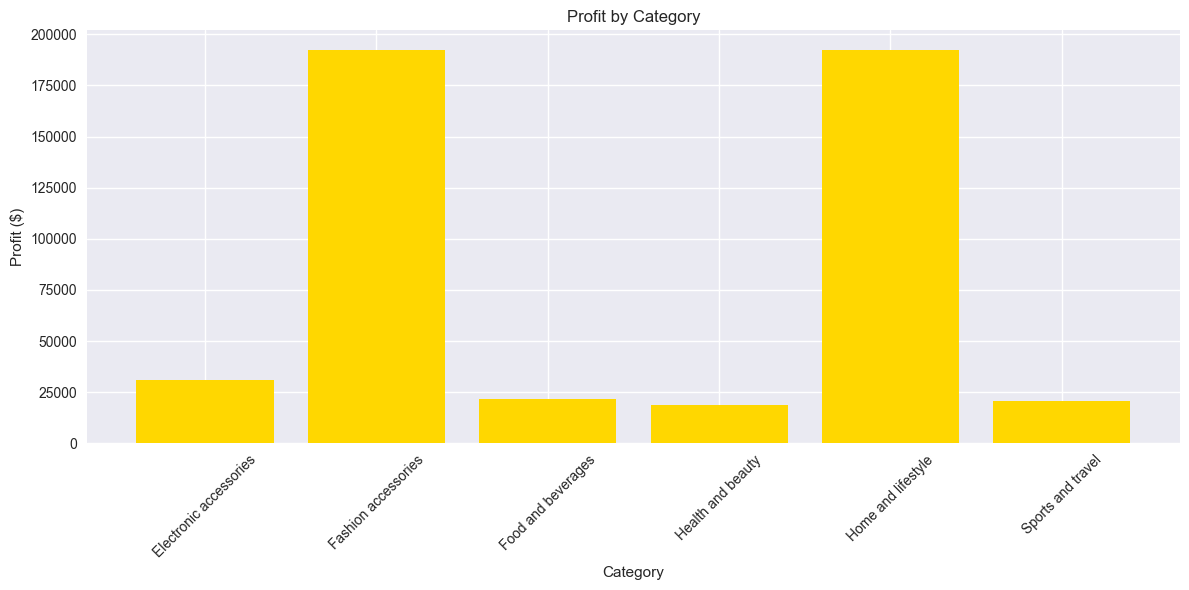

In [ ]:
# Profit by category
plt.figure(figsize=(12, 6))
categories = list(profit_by_category.index)
profits = list(profit_by_category.values)

plt.bar(categories, profits, color='gold')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


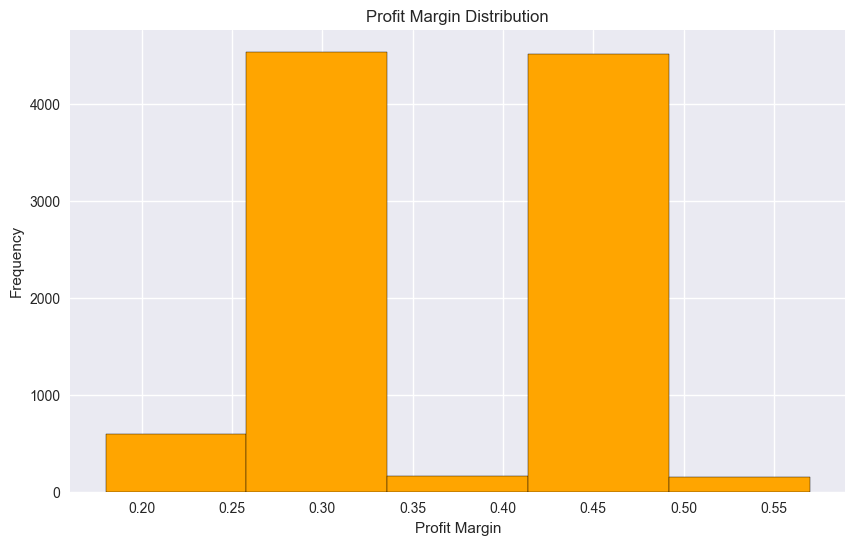

In [ ]:
# Profit margin distribution
plt.figure(figsize=(10, 6))
plt.hist(df['profit_margin'], bins=5, color='orange', edgecolor='black')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

In [46]:
print("\n=== CORRELATIONS ===")

# Simple correlation checks
rating_sales_corr = df['rating'].corr(df['total'])
price_quantity_corr = df['unit_price'].corr(df['quantity'])
price_sales_corr = df['unit_price'].corr(df['total'])

print(f"Rating vs Sales correlation: {rating_sales_corr:.3f}")
print(f"Price vs Quantity correlation: {price_quantity_corr:.3f}")
print(f"Price vs Sales correlation: {price_sales_corr:.3f}")



=== CORRELATIONS ===
Rating vs Sales correlation: 0.111
Price vs Quantity correlation: 0.062
Price vs Sales correlation: 0.531


In [49]:
category_payment_crosstab = pd.crosstab(df['category'], df['payment_method'], normalize='index') * 100
print("Payment Method Usage by Category (%):")
print(category_payment_crosstab.round(1))

Payment Method Usage by Category (%):
payment_method          Cash  Credit card  Ewallet
category                                          
Electronic accessories  21.7         59.9     18.4
Fashion accessories     17.6         42.2     40.1
Food and beverages      35.1         32.8     32.2
Health and beauty       32.2         34.9     32.9
Home and lifestyle      17.1         42.6     40.4
Sports and travel       36.7         31.9     31.3


<Figure size 1400x800 with 0 Axes>

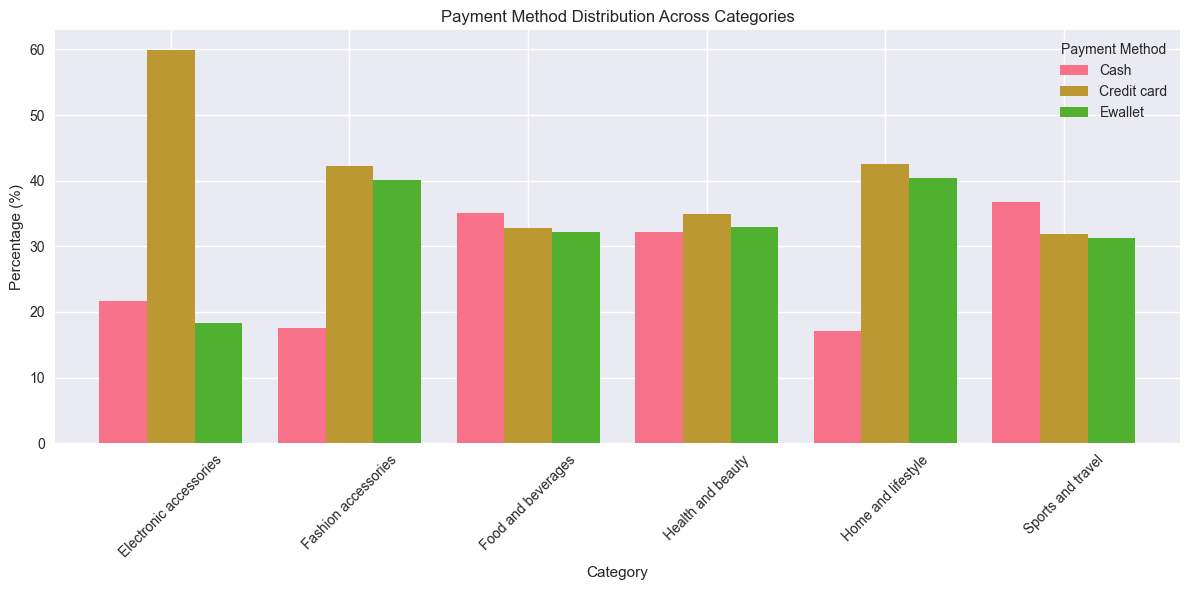

In [51]:
# Plot: Grouped bar chart
plt.figure(figsize=(14, 8))
category_payment_crosstab.plot(kind='bar', width=0.8)
plt.title('Payment Method Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
